## Actionable Insights On New Movies

Please fill out:
* Anthony Brocco 
* Full Time NYC-DS-080723
* Phase 2  
* Joe Matta

## In this jupyter notebook we explore movie datasets from:

Box Office https://www.boxofficemojo.com/

IMDB https://www.imdb.com/

Rotten Tomatoes https://www.rottentomatoes.com/

TheMovieDB https://www.themoviedb.org/

The Numbers https://www.the-numbers.com/

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_budget = pd.read_csv('../zippedData/movie_budget_cleaned.csv', index_col = 0)
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279",5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875",1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747",3.153696
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,$0,-1.000000
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495",39.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338",-0.732400
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0,-1.000000


In [3]:
df_successful = df_budget[df_budget['ROI'] > 1]

In [4]:
df_basics = pd.read_csv('../zippedData/movie_basics_cleaned.csv',index_col = 0)
df_basics

,movie_id,primary_title,original_title,genres,averagerating,numvotes,start_year,runtime_minutes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,Romance,8.3,31,2019,117.0
1,tt10384606,Borderless,Borderless,Documentary,8.9,559,2019,87.0
2,tt1042974,Just Inès,Just Inès,Drama,6.4,20,2010,90.0
3,tt1043726,The Legend of Hercules,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352,2014,99.0
4,tt1060240,Até Onde?,Até Onde?,"Mystery,Thriller",6.5,21,2011,73.0
...,...,...,...,...,...,...,...,...
73851,tt9805820,Caisa,Caisa,Documentary,8.1,25,2018,84.0
73852,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,"Action,Animation,Sci-Fi",7.5,24,2018,120.0
73853,tt9851050,Sisters,Sisters,"Action,Drama",4.7,14,2019,NaN
73854,tt9886934,The Projectionist,The Projectionist,Documentary,7.0,5,2019,81.0


In [5]:
# Drop 'movie_id' column from df_basics
df_basics = df_basics.drop('movie_id', axis=1)

# Drop 'id' column from df_successful
df_successful = df_successful.drop('id', axis=1)

# Merge the DataFrames using 'movie' column from df_successful and 'primary_title'
merged_df = pd.merge(df_successful, df_basics, left_on='movie', right_on='primary_title', how='inner')

# Create a new DataFrame by combining 'primary_title' and 'original_title'
merged_df['title'] = merged_df['primary_title'].combine_first(merged_df['original_title'])

# Drop 'primary_title' and 'original_title' columns
merged_df = merged_df.drop(['primary_title', 'original_title'], axis=1)


In [6]:
merged_df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'ROI', 'genres', 'averagerating', 'numvotes',
       'start_year', 'runtime_minutes', 'title'],
      dtype='object')

In [7]:
successful_movies_df = merged_df.drop(['title', 'domestic_gross',
       'worldwide_gross', 'start_year'],axis = 1).drop_duplicates(subset = 'movie')
successful_movies_df.columns

Index(['release_date', 'movie', 'production_budget', 'ROI', 'genres',
       'averagerating', 'numvotes', 'runtime_minutes'],
      dtype='object')

In [8]:
#filtering for movies with budget greater than $20 Mil to make it more relevant to our budget
relevant_movies_df = successful_movies_df[successful_movies_df['production_budget'] > 20000000]
relevant_movies_df

,release_date,movie,production_budget,ROI,genres,averagerating,numvotes,runtime_minutes
0,"Dec 18, 2009",Avatar,425000000,5.532577,Horror,6.1,43,93.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1.546673,"Action,Adventure,Fantasy",6.6,447624,136.0
2,"May 1, 2015",Avengers: Age of Ultron,330600000,3.243841,"Action,Adventure,Sci-Fi",7.3,665594,141.0
3,"Apr 27, 2018",Avengers: Infinity War,300000000,5.827114,"Action,Adventure,Sci-Fi",8.5,670926,149.0
4,"Nov 17, 2017",Justice League,300000000,1.186484,"Action,Adventure,Fantasy",6.5,329135,120.0
...,...,...,...,...,...,...,...,...
643,"Nov 16, 2012",Silver Linings Playbook,21000000,10.257736,"Comedy,Drama,Romance",7.7,621018,122.0
644,"Apr 6, 2018",Blockers,21000000,3.478349,Comedy,6.2,57142,102.0
645,"Apr 5, 2019",Pet Sematary,21000000,4.214340,"Horror,Mystery,Thriller",6.0,34472,101.0
647,"Apr 16, 2010",Death at a Funeral,21000000,1.332249,Comedy,5.7,42042,92.0


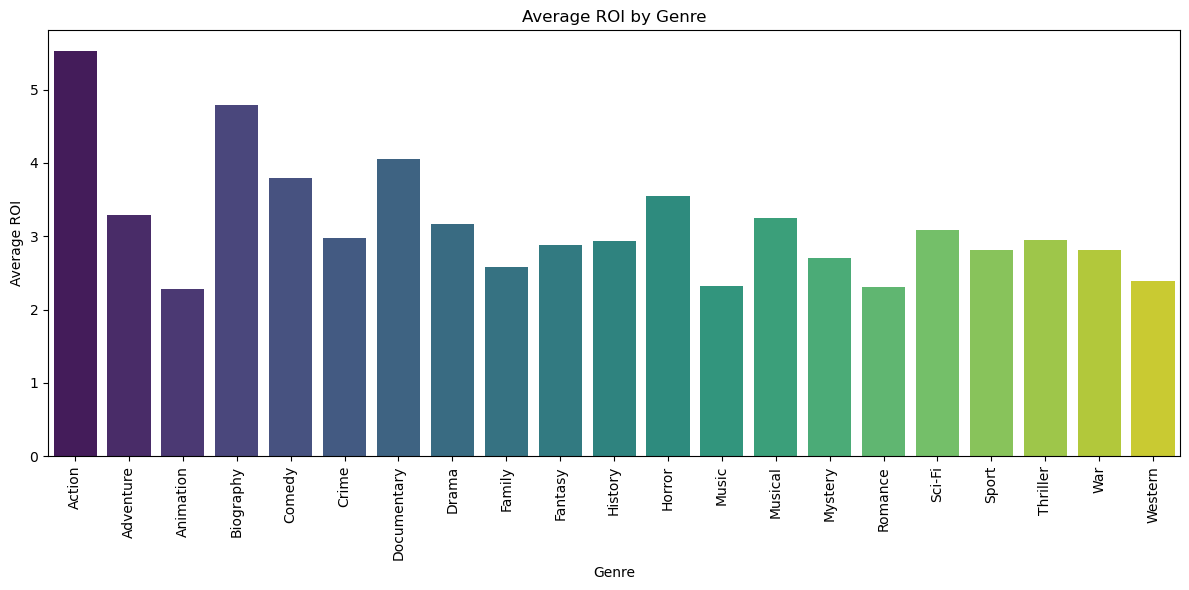

In [10]:
# Step 1: Preprocess the genres column using the split and stack functions, and then resetting the index
genres_df = relevant_movies_df['genres'].str.split(',', expand=True).stack().reset_index(level=0, drop=True).rename('genre')
merged_df = relevant_movies_df.drop('genres', axis=1).join(genres_df)

# Step 2: Calculate average ROI for each genre
genre_roi_avg = merged_df.groupby('genre')['ROI'].mean().reset_index()

# Step 3: Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_roi_avg, x='genre', y='ROI', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.tight_layout()
plt.show()


## Business Questions
What are the top-grossing movie genres in the current market, and how have their popularity trends evolved over the past few years?

Which demographic groups are driving the highest box office revenue, and what genres or themes resonate most with these audiences?

Can we identify any successful trends or patterns in the distribution and marketing strategies of recent blockbuster movies?

What are the most lucrative international markets for Hollywood films, and how can we tailor our content to appeal to these diverse audiences?

Are there any untapped niche genres or storytelling approaches that have shown potential for profitability in the modern movie landscape?

How do critical acclaim and audience reception correlate with box office success, and can we use this information to refine our content development and marketing strategies?

What are the emerging technologies and platforms (e.g., streaming services, virtual reality) that are shaping the future of the film industry, and how can we leverage them to our advantage?

What is the average budget range for successful movies in various genres, and how can we allocate our resources effectively to maximize ROI?

Who are the rising talents, directors, writers, and actors in the industry, and how can we collaborate with them to enhance the appeal of our productions?

What is the competitive landscape like in the movie industry, and what unique selling propositions can our studio develop to stand out and capture market share?